In [13]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
%matplotlib inline


In [14]:
# change defaults to be less ugly
mpl.rc('xtick', labelsize=14, color="#222222") 
mpl.rc('ytick', labelsize=14, color="#222222") 
mpl.rc('font', **{'family':'sans-serif','sans-serif':['Arial']})
mpl.rc('font', size=16)
mpl.rc('xtick.major', size=6, width=1)
mpl.rc('xtick.minor', size=3, width=1)
mpl.rc('ytick.major', size=6, width=1)
mpl.rc('ytick.minor', size=3, width=1)
mpl.rc('axes', linewidth=1, edgecolor="#222222", labelcolor="#222222")
mpl.rc('text', usetex=False, color="#222222")

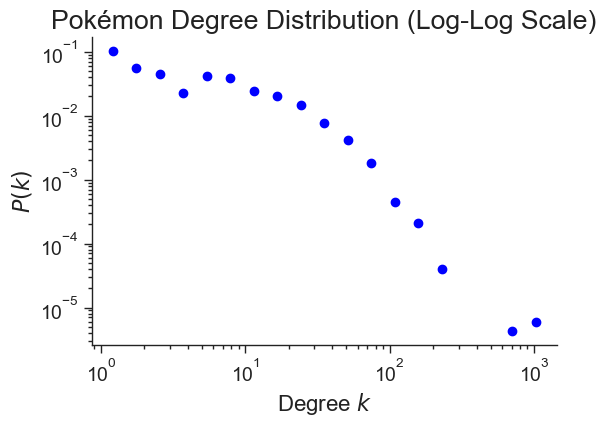

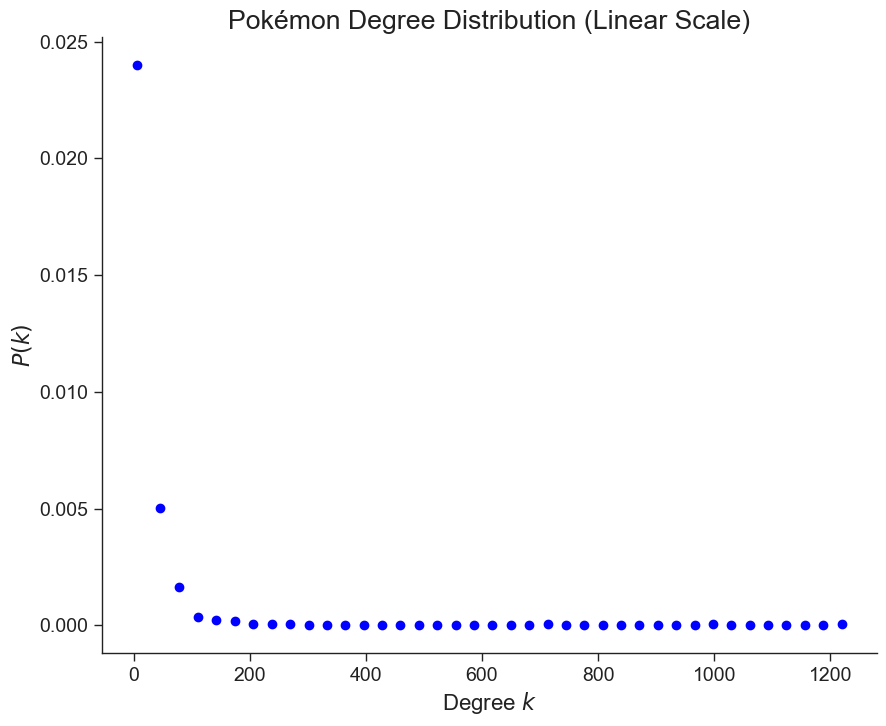

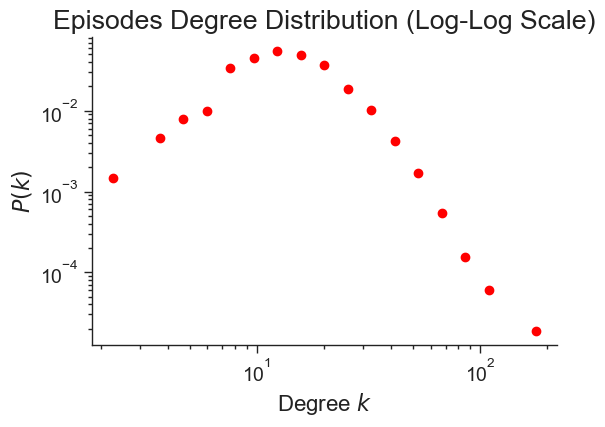

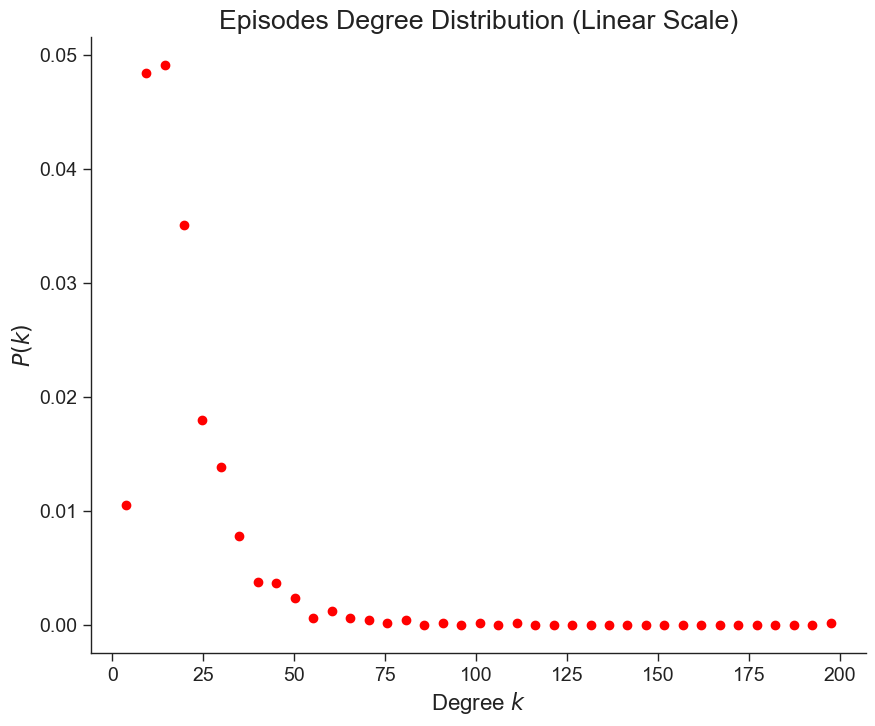

In [15]:
# Load nodes
pokemon = pd.read_csv('../../datasets/clean/pokemon_nodes.csv')
episodes = pd.read_csv('../../datasets/clean/episode_nodes.csv')

pokemon_ids = pokemon['Id']
episode_ids = episodes['Id']
all_nodes = pd.concat([pokemon_ids, episode_ids])

G = nx.Graph()

G.add_nodes_from(all_nodes)

# Read edge list
G = nx.read_edgelist('../../datasets/clean/edge_list.csv', 
                     delimiter=",",  
                     nodetype=int,    
                     encoding='utf-8', comments="Source")

# Classify nodes
pokemon_nodes = {node for node in G.nodes if node < 10000}
episode_nodes = set(G.nodes) - pokemon_nodes

# Compute degrees
pokemon_degrees = np.array([G.degree(n) for n in pokemon_nodes])
episode_degrees = np.array([G.degree(n) for n in episode_nodes])

# Remove zero-degree nodes for log-log plotting (avoiding log(0) errors)
pokemon_degrees_nonzero = pokemon_degrees[pokemon_degrees > 0]
episode_degrees_nonzero = episode_degrees[episode_degrees > 0]

# Define function to plot both log-log and linear distributions
def plot_degree_distribution(degrees, title, color):
    if len(degrees) == 0:
        print(f"No nodes with nonzero degree for {title}. Skipping plot.")
        return

    kmin, kmax = degrees.min(), degrees.max()
    kmin = max(kmin, 1)  # Ensure kmin is at least 1 to avoid log(0)

    # Log-log plot
    bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=20)
    density, _ = np.histogram(degrees, bins=bin_edges, density=True)

    log_be = np.log10(bin_edges)
    x = 10**((log_be[1:] + log_be[:-1]) / 2)

    fig = plt.figure(figsize=(6,4))
    plt.loglog(x, density, marker='o', linestyle='none', color=color)
    plt.xlabel(r"Degree $k$", fontsize=16)
    plt.ylabel(r"$P(k)$", fontsize=16)
    plt.title(f"{title} Degree Distribution (Log-Log Scale)")

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    plt.show()

    # Linear plot
    bin_edges = np.linspace(kmin, kmax, num=40)
    density, _ = np.histogram(degrees, bins=bin_edges, density=True)

    log_be = np.log10(bin_edges)
    x = 10**((log_be[1:] + log_be[:-1]) / 2)

    fig = plt.figure(figsize=(10,8))
    plt.plot(x, density, marker='o', linestyle='none', color=color)
    plt.xlabel(r"Degree $k$", fontsize=16)
    plt.ylabel(r"$P(k)$", fontsize=16)
    plt.title(f"{title} Degree Distribution (Linear Scale)")

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    plt.show()

# Plot for Pokémon (excluding zero-degree nodes for log-log)
plot_degree_distribution(pokemon_degrees_nonzero, "Pokémon", "blue")

# Plot for Episodes (excluding zero-degree nodes for log-log)
plot_degree_distribution(episode_degrees_nonzero, "Episodes", "red")


In [16]:
# print summary

# Find nodes with highest degree 
max_degree_pokemon_id = max(pokemon_nodes, key=lambda n: G.degree(n))
max_degree = G.degree(max_degree_pokemon_id)

max_degree_pokemon_name = pokemon.loc[pokemon['Id'] == max_degree_pokemon_id, 'Label'].iloc[0]

max_degree_episode_id = max(episode_nodes, key=lambda n: G.degree(n))
max_degree_episode = G.degree(max_degree_episode_id)

max_degree_episode_name = episodes.loc[episodes['Id'] == max_degree_episode_id, 'Label'].iloc[0]


# Filter out nodes with degree 0
pokemon_nodes_filtered = {node for node in pokemon_nodes if G.degree(node) > 0}

# Find the Pokémon with the lowest degree
min_degree_pokemon_id = min(pokemon_nodes_filtered, key=lambda n: G.degree(n))
min_degree_pokemon = G.degree(min_degree_pokemon_id)

# Access the Pokémon name using the ID from the DataFrame
min_degree_pokemon_name = pokemon.loc[pokemon['Id'] == min_degree_pokemon_id, 'Label'].iloc[0]

# Find the Episode with the lowest degree
min_degree_episode_id = min(episode_nodes, key=lambda n: G.degree(n))
min_degree_episode = G.degree(min_degree_episode_id)

# Access the episode name using the ID from the DataFrame
min_degree_episode_name = episodes.loc[episodes['Id'] == min_degree_episode_id, 'Label'].iloc[0]

print("Number of Pokémon:", len(pokemon))
print("Number of Episodes:", len(episodes))

print("\nAverage Pokémon Degree:", np.mean(pokemon_degrees) if len(pokemon_degrees) > 0 else "N/A")
print("Average Episode Degree:", np.mean(episode_degrees) if len(episode_degrees) > 0 else "N/A")

print(f"\nHighest Pokemon degree ({max_degree_pokemon_name}): {max_degree}")
print(f"Highest episode degree ({max_degree_episode_id - 10000}, {max_degree_episode_name}): {max_degree_episode}")

print(f"\nLowest Pokemon degree (excluding degree 0) is ({min_degree_pokemon_name}): {min_degree_pokemon}")
print(f"Lowest episode degree is ({min_degree_episode_id - 10000}, {min_degree_episode_name}): {min_degree_episode}")

Number of Pokémon: 905
Number of Episodes: 1236

Average Pokémon Degree: 27.688
Average Episode Degree: 19.601132686084142

Highest Pokemon degree (Pikachu): 1235
Highest episode degree (1225, Ash and Goh! Setting Off Anew!!): 200

Lowest Pokemon degree (excluding degree 0) is (Eelektrik): 1
Lowest episode degree is (39, Forest of Pikachu): 2
